# An example Jupyter Notebook

This notebook is a demonstration of directly-parsing Jupyter Notebooks into
Sphinx using the MyST parser.

```{warning}
This is currently an **alpha feature** that may behave in unexpected ways,
or change in the near future.
```

## Markdown

As you can see, markdown is parsed as expected. Embedding images should work as expected.
For example, here's the MyST-nb logo:

![](_static/logo.png)

because MyST-NB is using the MyST-markdown parser, you can include rich markdown with Sphinx
in your notebook. For example, here's a note block:

`````{note}
Wow, a note! It was generated with this code:

````
```{note}
Wow, a note!
```
````
`````

## Code cells and outputs

You can run cells, and the cell outputs will be captured and inserted into
the resulting Sphinx site.

### `__repr__` and HTML outputs

For example, here's some simple Python:

In [1]:
import numpy as np
data = np.random.rand(3, 100) * 100
data[:, :10]

array([[22.38055429, 67.90977475, 51.55788272, 71.23940778, 78.64109913,
        55.53921004, 28.6953091 ,  3.95167135, 76.64497373, 87.27949133],
       [11.49399342,  0.83062084, 39.02719245, 46.01895124, 72.81924055,
        76.68761264, 53.18166162, 14.16905566, 86.62823197, 11.2492978 ],
       [53.39208456, 45.24277182, 72.51188618, 24.71627841, 82.41515846,
        14.68002949, 10.25920381, 41.14675   , 83.80911362, 79.83465415]])

This will also work with HTML outputs

In [2]:
import pandas as pd
df = pd.DataFrame(data.T, columns=['a', 'b', 'c'])
df.head()

,a,b,c
0,22.380554,11.493993,53.392085
1,67.909775,0.830621,45.242772
2,51.557883,39.027192,72.511886
3,71.239408,46.018951,24.716278
4,78.641099,72.819241,82.415158


### Images

Images that are generated from your code (e.g., with Matplotlib) will also
be embedded.

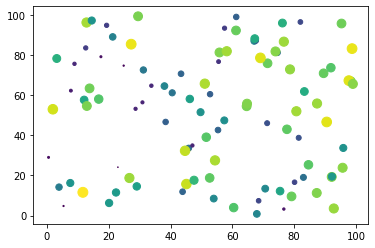

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(*data, c=data[2])

### Interactive outputs

Interactive outputs will work under the assumption that the outputs they produce have
self-contained HTML that works without requiring any external dependencies to load.
For example, the `Altair` "html" output works well:

In [4]:
import altair as alt
alt.Chart(data=df).mark_point().encode(
    x='a',
    y='b',
    color='c',
    size='c'
)

alt.Chart(...)

### The IPywidget ecosystem

You may also run code for Jupyter Widget in your document, and the interactive HTML
outputs will embed themselves in your side.

Here is an example from ipyvolume:

In [5]:
import ipywidgets as widgets
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)




IntSlider(value=7, continuous_update=False, description='Test:', max=10)

In [6]:
tab_contents = ['P0', 'P1', 'P2', 'P3', 'P4']
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab()
tab.children = children
tab.titles = [str(i) for i in range(len(children))]
tab


## Hiding cell contents

You can use Jupyter Notebook **cell tags** to control some of the behavior of
the rendered notebook. This uses the [**`sphinx-togglebutton`**](https://sphinx-togglebutton.readthedocs.io/en/latest/)
package to add a little button that toggles the visibility of content.

### Hiding code cells

You can **cell tags** to control the content hidden with code cells.
Add the following tags to a cell's metadata to control
what to hide in code cells:

* **`hide_input`** tag to hide the cell inputs
* **`hide_output`** to hide the cell outputs
* **`hide_cell`** to hide the entire cell

### Hiding markdown cells

There are two ways to hide markdown cells. First, **you can add the `hide_input`**
cell metadata. This triggers the same hiding behavior described above for
code cells.

This cell was hidden by adding a `hide_input` tag to it!

You may also **use a Sphinx directive** to hide specific markdown content. This
is possible by adding the **`.toggle`** class to any block-level directive
that will allow for classes. For example, to the `container`, `note`, or `admonition`
directives.

For example:

`````{admonition} This cell was hidden with the toggle class
:class: toggle

It uses the following code:

````
```{admonition} This cell was hidden with the toggle class
:class: toggle
It uses the following code:
<block-content-here>
```
````
`````

```{warning}
**Don't add headings to toggle-able sections**

Note that containers for markdown (like notes, or this `container`
directive) cannot have their own headings. Use **bolded text** if
you want to highlight sections of a toggle-able section.
```